### Análise de um dataframe de um supermarket com suas filias. 

O  dataframe consiste em ID do produto, o vendedor, a cidade, o tipo de cliente, gênero, linha de produto, preço unitário, quantidade vendida, quanto ficou a taxa de 5%, quantidade de vendas, a data, o tempo, formar de pagamento, cogs, margem de porcentagem do gross e a nota do usúario. 

O objetivo é destrinchar as informações para pegar as melhores opções e visualizar os dados. Levando em conta o tempo e a métricas financeiras.

Importação das bibliotecas utilizadas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Leitura e correção da base de dados. Arredondando os valores quebrados.

In [2]:
supermarket_df = pd.read_csv('SuperMarket Analysis.csv')
supermarket_df = supermarket_df.round(2)
supermarket_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,1:08:00 PM,Ewallet,522.83,4.76,26.14,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29:00 AM,Cash,76.40,4.76,3.82,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,1:23:00 PM,Credit card,324.31,4.76,16.22,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.29,489.05,1/27/2019,8:33:00 PM,Ewallet,465.76,4.76,23.29,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37:00 AM,Ewallet,604.17,4.76,30.21,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.02,42.37,1/29/2019,1:46:00 PM,Ewallet,40.35,4.76,2.02,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.69,1022.49,3/2/2019,5:16:00 PM,Ewallet,973.80,4.76,48.69,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.59,33.43,2/9/2019,1:22:00 PM,Cash,31.84,4.76,1.59,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.29,69.11,2/22/2019,3:33:00 PM,Cash,65.82,4.76,3.29,4.1


O DF não apresentou nenhum número vazio, facilitando a exploração dos dados. Evitando a limpeza profunda.

In [3]:
supermarket_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Análises Descritivas Gerais

Aqui é a parte geral do dataset, mostrando os melhores vendedores, total de vendas por cidade, lucro total e produtos que mais vendeu. 

A análise é focada para ver os melhores resultados. 

### Verificando os vendedores. 

Ao analisar a quantidade total de vendas por filial, observamos que **Giza** apresentou o melhor desempenho, com **45 vendas**. As filiais **Alex** e **Cairo** ficaram logo atrás, com 44 e 39 vendas, respectivamente.

Embora a diferença entre as duas primeiras não seja tão significativa, a filial **Cairo apresenta uma performance inferior**, ficando abaixo das 40 vendas. Com base nisso, **poderia ser interessante estabelecer metas mínimas de vendas por filial**, a fim de equilibrar o desempenho entre as unidades e identificar possíveis gargalos operacionais ou de atendimento.


In [4]:
# maior vendedor 

vendedor = supermarket_df.groupby(['Branch', 'Quantity']).size().reset_index(name='Quantidade de vendas')
vendedor = vendedor.sort_values(['Branch', 'Quantidade de vendas'], ascending=[True, False])
vendedor = vendedor.groupby('Branch').first().reset_index()
vendedor = vendedor[['Branch', 'Quantidade de vendas']]
vendedor = vendedor.sort_values(by='Quantidade de vendas', ascending=False)
vendedor

,Branch,Quantidade de vendas
2,Giza,45
0,Alex,44
1,Cairo,39


### Verficando em gráfico

**Giza** e **Alex** passando da linha da meta. Embora **Cairo** tenha feito um bom número, está abaixo da linha da meta. 

<function matplotlib.pyplot.show(close=None, block=None)>

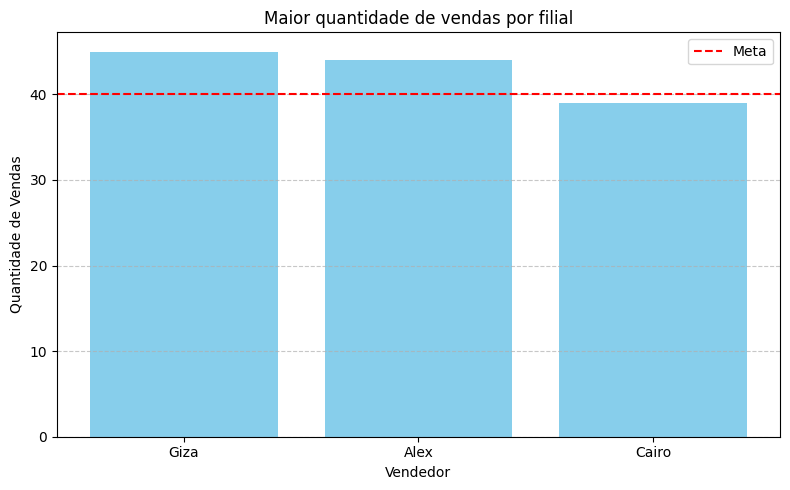

In [5]:
branches = vendedor['Branch']
quantidade = vendedor['Quantidade de vendas']

plt.figure(figsize=(8,5))
plt.bar(branches, quantidade, color='skyblue')
plt.axhline(y=40, color='red', linestyle='--', linewidth=1.5, label='Meta')
plt.xlabel('Vendedor')
plt.ylabel('Quantidade de Vendas')
plt.title('Maior quantidade de vendas por filial')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show

### Total de vendas por cidade e produto

Verificando qual cidade teve mais vendas por produto. Se tem o resultado de **Naypytaw** ter uma venda de **1042.65** produtos, sendo eles de **Fashion Accessories**. Note que o segundo colocado, **Yangon** também teve ótimas quantidades de vendas e também sendo **Fashion Accessories**.

In [6]:
#Total de vendas por cidade, produto e vendas
total_vendas = supermarket_df[['City', 'Product line', 'Sales']]
total_vendas = total_vendas.sort_values(by='Sales',ascending=False)
total_vendas

,City,Product line,Sales
350,Naypyitaw,Fashion accessories,1042.65
167,Yangon,Fashion accessories,1039.29
557,Naypyitaw,Food and beverages,1034.46
699,Naypyitaw,Home and lifestyle,1023.75
996,Mandalay,Home and lifestyle,1022.49
...,...,...,...
402,Naypyitaw,Home and lifestyle,14.68
443,Naypyitaw,Fashion accessories,13.42
223,Naypyitaw,Fashion accessories,13.17
629,Yangon,Fashion accessories,12.69


### Verificando o Total de vendas por cidade

Agora vendo o somatório de vendas e qual cidade se destacou mais. Foi **Naypytaw** com **110568.71** vendas ao todo.

In [7]:

vendas_por_cidade = supermarket_df.groupby('City')['Sales'].agg(
    total = 'sum'
).reset_index()

vendas_por_cidade['total'] = vendas_por_cidade['total'].round(2)

vendas_por_cidade = vendas_por_cidade.sort_values(by='total', ascending=False)

vendas_por_cidade

,City,total
1,Naypyitaw,110568.71
2,Yangon,106200.37
0,Mandalay,106197.74


### Produtos mais vendidos 

Somando todas as quantidades de vendas dos produtos. O que mais se destacou foi **Fashion Acessories** com **178** quantidades vendidas.

In [8]:
#produtos que mais vendeu
supermarket_df['Product line'].value_counts(ascending=False)

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

### Análises temporais

Agora seguiremos para análises voltadas para o tempo e datas. Entendendo quais são as melhores horas e dias.

Análisando o dia mais vendido com o total completo de vendas, foi em **2/07/19** com um total de **20** vendas.

In [9]:
#Dia com mais vendas
supermarket_df['Date'].value_counts()

Date
2/7/2019     20
2/15/2019    19
3/2/2019     18
1/8/2019     18
3/14/2019    18
             ..
2/1/2019      6
1/4/2019      6
3/21/2019     6
2/21/2019     6
3/17/2019     6
Name: count, Length: 89, dtype: int64

Análisando por **cidade** separadamente. Vemos que tem uma distribuição quase igual de quantidade vendidas. **Mandalay** e **Naypytaw** tem **10** vendas em dias próximos, ambos em **janeiro**. Enquanto **Yangon** teve o seu melhor resultado somente em **abril**. 

In [10]:
#Dia com mais vendas por cidade

# Conta o número de vendas por cidade e data
vendas_por_cidade_data = supermarket_df.groupby(['City', 'Date']).size().reset_index(name='Quantidade')

# Para cada cidade, seleciona o dia com mais vendas
dia_mais_vendas_por_cidade = vendas_por_cidade_data.sort_values(['City', 'Quantidade'], ascending=[True, False])
dia_mais_vendas_por_cidade = dia_mais_vendas_por_cidade.groupby('City').first().reset_index()

dia_mais_vendas_por_cidade


,City,Date,Quantidade
0,Mandalay,1/26/2019,10
1,Naypyitaw,1/23/2019,10
2,Yangon,3/4/2019,9


### Melhor horário para as vendas

O horário que mais se repediu em uma contagem geral foi as **2:42 PM**. Tendo **7 compras neste horário**.

In [11]:
#Horario com mais vendas
supermarket_df['Time'].value_counts()

Time
2:42:00 PM     7
7:48:00 PM     7
5:38:00 PM     6
1:48:00 PM     5
10:11:00 AM    5
              ..
4:27:00 PM     1
3:23:00 PM     1
6:18:00 PM     1
3:17:00 PM     1
7:12:00 PM     1
Name: count, Length: 506, dtype: int64

Verificando o **melhor horário** por **cidade**. Em todas as cidades foram **3** a quantidade de vendas. Os horarios são relativamente próximos, principalmente **Mandalay** e **Naypytaw** , onde os horários são **10:11 AM** e **10:02 AM**, respectivamente. Já em **Yangon** foi no hórario de **11:51 AM**.

In [12]:
#horario com mais vendas por cidade

horario_por_cidade = supermarket_df.groupby(['City', 'Time']).size().reset_index(name='Quantidade')
horario_por_cidade = horario_por_cidade.sort_values(['City', 'Quantidade'], ascending=[True, False])
horario_por_cidade = horario_por_cidade.groupby('City').first().reset_index()
horario_por_cidade

,City,Time,Quantidade
0,Mandalay,10:11:00 AM,3
1,Naypyitaw,10:02:00 AM,3
2,Yangon,11:51:00 AM,3


### Métricas financeiras

Aqui onde verificamos a parte financeira. Tendo seus lucros, média de gross, o cogs e analisando a taxa.

O **Lucro Bruto Total** foi de **R$15.379,52**.

In [13]:
#Lucro Bruto total
lucro_bruto_total = supermarket_df['gross income'].sum()
lucro_bruto_total

np.float64(15379.51)

A **média de margem bruta** foi de **R$4,76**.

In [14]:
#média de margem bruta

supermarket_df['gross margin percentage'].mean()

np.float64(4.76)

O **COGs** médio foi de **R$307,58**.

In [15]:
#COGs médio

supermarket_df['cogs'].mean()

np.float64(307.58738)

O valor médio da **taxa de 5%** é de **R$15,37**.

In [16]:
#média taxa

supermarket_df['Tax 5%'].mean()

np.float64(15.37951)

O **valor máximo de taxa pago** foi de **R$49,65**. Repare que quanto maior o valor do **Preço Unico** maior será o **valor da taxa**.

In [17]:
#maior taxa

maior_taxa = supermarket_df[['Unit price', 'Quantity', 'Tax 5%']].sort_values(by='Tax 5%', ascending=False)
maior_taxa

,Unit price,Quantity,Tax 5%
350,99.30,10,49.65
167,98.98,10,49.49
557,98.52,10,49.26
699,97.50,10,48.75
996,97.38,10,48.69
...,...,...,...
402,13.98,1,0.70
443,12.78,1,0.64
223,12.54,1,0.63
629,12.09,1,0.60


### Análise de perfil

Última etapa do Notebook. A partir daqui será a análise dos clientes, identificando um potencial comprador.

Existem dois tipos de clientes no supermarket. **565 deles são membros**, mais da metade, e **435 pessoas são clientes comuns**. Os **menbros** são **clientes fieis**, seria de extrema importância dar uma vantagem a eles.

In [18]:
#vendas por tipo de cliente
supermarket_df['Customer type'].value_counts()

Customer type
Member    565
Normal    435
Name: count, dtype: int64

O genêro principal dos clientes é composto pelo **feminino**. Mais da mentade dos clientes são compostos por **571 mulheres**, enquanto o público **masculino tem 429 pessoas**.

In [19]:
#genero do cliente
supermarket_df['Gender'].value_counts()

Gender
Female    571
Male      429
Name: count, dtype: int64

A **principal** forma de pagamento de seus clientes é por meio da **carteira digital**, se tem **345 pessoas** a utilizando. O **Dinheiro** vem logo atrás, com *344 pessoas**, bem próximo ao primeiro colado. E por último, com **311 pessas** tem o **cartão de crédito** como opção.

In [20]:
#forma de pagamento
supermarket_df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

A **Média de notas dos clientes** é relativamente baixa. A média tem **6.97/10 como nota**, está quase no **7.0**, recomendo agradar mais um pouco os **clientes fieis** para ter uma nota mais alta e chamativa.

In [21]:
#média notas dos clientes
supermarket_df['Rating'].mean().round(2)

np.float64(6.97)

A **média por cidade** está **satisfatória**. A maioria acima de **7,0/10** na média, exceto **Mandalay** onde a nota está a baixo da média. Recomendável dar uma investida na loja, ela está com **6,82/10**, falta um pouco para alcançar a média.

In [22]:
#média por cidade 
notas_cidade = supermarket_df.groupby('City')['Rating'].agg(
    maior_nota ='max',
    menor_nota ='min',
    media ='mean'
).reset_index()

notas_cidade['media'] = notas_cidade['media'].round(2)

notas_cidade

,City,maior_nota,menor_nota,media
0,Mandalay,10.0,4.0,6.82
1,Naypyitaw,10.0,4.0,7.07
2,Yangon,10.0,4.0,7.03
